In [18]:
import requests
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer


In [19]:
ls


 PriscillaDay3AM.ipynb
David.ipynb
Davis-Pris API.ipynb
Pris - exploring actors on full df.ipynb
Pris-  exploring actors.ipynb
Pris- exploring Directors full df.ipynb
Pris- exploring genres-Copy1.ipynb
Pris- exploring genres-Copy2.ipynb
Pris- exploring genres.ipynb
Priscilla - exploring Regex.ipynb
Priscilla -API fetching .ipynb
Untitled.ipynb
Untitled1.ipynb
renato_call_data.ipynb


In [20]:
full_data_merged = pd.read_csv("./../raw_data/merged_movies_by_index.csv")
full_data_merged

,avg_review_score,n_reviews,year,title,Title,Year,Rated,Released,Runtime,Genre,...,Response,Internet Movie Database,Index_match,DVD,BoxOffice,Production,Website,Rotten Tomatoes,Metacritic,Ratings
0,3.749543,547,2003,Dinosaur Planet,Dinosaur Planet,2003,NaN,14 Dec 2003,50 min,"Documentary, Animation, Family",...,True,7.7/10,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3.641153,2012,1997,Character,Character,1997,R,27 Mar 1998,122 min,"Crime, Drama, Mystery",...,True,7.7/10,3,04 Feb 2003,"$623,983",Almerica Film,NaN,92%,NaN,NaN
2,3.084396,1019,1997,Sick,Sick,1997,Not Rated,07 Nov 1997,90 min,Documentary,...,True,7.5/10,6,15 Feb 2017,"$116,806",Sick-the Life and Death of Bob Flanagan-Superm...,NaN,91%,82/100,NaN
3,2.129032,93,1992,8 Man,8 Man,1992,NaN,NaN,83 min,"Action, Sci-Fi",...,True,5.4/10,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3.417582,546,1947,My Favorite Brunette,My Favorite Brunette,1947,Passed,04 Apr 1947,87 min,"Comedy, Crime, Mystery, Romance, Thriller",...,True,6.8/10,12,10 Mar 2016,NaN,"Paramount Pictures, Hope Enterprises",NaN,75%,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10381,3.411855,1957,1978,Interiors,Interiors,1978,PG,06 Oct 1978,92 min,Drama,...,True,7.4/10,17763,02 Feb 2017,"$10,432,366",Rollins-Joffe Productions,NaN,79%,67/100,NaN
10382,3.867112,64957,1998,Shakespeare in Love,Shakespeare in Love,1998,R,08 Jan 1999,123 min,"Comedy, Drama, History, Romance",...,True,7.1/10,17764,21 Apr 2016,"$100,317,794","Miramax Films, Bedford Falls Productions, Univ...",NaN,92%,87/100,NaN
10383,2.839207,1362,2000,Epoch,Epoch,2001,PG-13,24 Nov 2001,96 min,"Sci-Fi, Thriller",...,True,5.0/10,17768,25 Jan 2017,NaN,Metro-Goldwyn-Mayer,NaN,16%,NaN,NaN
10384,2.498592,6749,2003,The Company,The Company,2003,PG-13,20 May 2004,112 min,"Drama, Music, Romance",...,True,6.3/10,17769,16 Apr 2012,"$2,283,914","First Snow Production, Capitol Films, Sandcast...",NaN,72%,73/100,NaN


In [21]:
full_data_merged.columns


Index(['avg_review_score', 'n_reviews', 'year', 'title', 'Title', 'Year',
       'Rated', 'Released', 'Runtime', 'Genre', 'Director', 'Writer', 'Actors',
       'Plot', 'Language', 'Country', 'Awards', 'Poster', 'Metascore',
       'imdbRating', 'imdbVotes', 'imdbID', 'Type', 'totalSeasons', 'Response',
       'Internet Movie Database', 'Index_match', 'DVD', 'BoxOffice',
       'Production', 'Website', 'Rotten Tomatoes', 'Metacritic', 'Ratings'],
      dtype='object')

In [22]:
full_data_merged.Actors[0]

'Christian Slater, Scott Sampson'

In [23]:
full_data_merged['Actors'] = full_data_merged["Actors"].fillna('N/A')

In [24]:
df = full_data_merged[["Title", "Actors"]].copy()
df

,Title,Actors
0,Dinosaur Planet,"Christian Slater, Scott Sampson"
1,Character,"Jan Decleir, Fedja van Huêt, Betty Schuurman, ..."
2,Sick,"Kathe Burkhart, Kirby Dick, Bob Flanagan, Sher..."
3,8 Man,"Kai Shishido, Etsushi Takahashi, Sachiko Ayase..."
4,My Favorite Brunette,"Bob Hope, Dorothy Lamour, Peter Lorre, Lon Cha..."
...,...,...
10381,Interiors,"Diane Keaton, Geraldine Page, Kristin Griffith"
10382,Shakespeare in Love,"Geoffrey Rush, Tom Wilkinson, Steven O'Donnell..."
10383,Epoch,"David Keith, Stephanie Niznik, Ryan O'Neal, Br..."
10384,The Company,"Neve Campbell, Malcolm McDowell, James Franco,..."


In [25]:
df = full_data_merged[["Title", "Actors"]].copy()

df["actors_list"] = df["Actors"].str.split(", ") #.apply(lambda x : x.split(", "))
df

,Title,Actors,actors_list
0,Dinosaur Planet,"Christian Slater, Scott Sampson","[Christian Slater, Scott Sampson]"
1,Character,"Jan Decleir, Fedja van Huêt, Betty Schuurman, ...","[Jan Decleir, Fedja van Huêt, Betty Schuurman,..."
2,Sick,"Kathe Burkhart, Kirby Dick, Bob Flanagan, Sher...","[Kathe Burkhart, Kirby Dick, Bob Flanagan, She..."
3,8 Man,"Kai Shishido, Etsushi Takahashi, Sachiko Ayase...","[Kai Shishido, Etsushi Takahashi, Sachiko Ayas..."
4,My Favorite Brunette,"Bob Hope, Dorothy Lamour, Peter Lorre, Lon Cha...","[Bob Hope, Dorothy Lamour, Peter Lorre, Lon Ch..."
...,...,...,...
10381,Interiors,"Diane Keaton, Geraldine Page, Kristin Griffith","[Diane Keaton, Geraldine Page, Kristin Griffith]"
10382,Shakespeare in Love,"Geoffrey Rush, Tom Wilkinson, Steven O'Donnell...","[Geoffrey Rush, Tom Wilkinson, Steven O'Donnel..."
10383,Epoch,"David Keith, Stephanie Niznik, Ryan O'Neal, Br...","[David Keith, Stephanie Niznik, Ryan O'Neal, B..."
10384,The Company,"Neve Campbell, Malcolm McDowell, James Franco,...","[Neve Campbell, Malcolm McDowell, James Franco..."


In [10]:
df_explode = df.explode(column = "actors_list")
df_explode

,Title,Actors,actors_list
0,Dinosaur Planet,"Christian Slater, Scott Sampson",Christian Slater
0,Dinosaur Planet,"Christian Slater, Scott Sampson",Scott Sampson
1,Character,"Jan Decleir, Fedja van Huêt, Betty Schuurman, ...",Jan Decleir
1,Character,"Jan Decleir, Fedja van Huêt, Betty Schuurman, ...",Fedja van Huêt
1,Character,"Jan Decleir, Fedja van Huêt, Betty Schuurman, ...",Betty Schuurman
...,...,...,...
10384,The Company,"Neve Campbell, Malcolm McDowell, James Franco,...",James Franco
10384,The Company,"Neve Campbell, Malcolm McDowell, James Franco,...",Barbara E. Robertson
10385,Alien Hunter,"James Spader, Janine Eser, John Lynch",James Spader
10385,Alien Hunter,"James Spader, Janine Eser, John Lynch",Janine Eser


In [11]:
df_explode["actors_proc"] = df_explode["actors_list"].str.lower().str.split(" ").apply(lambda x: " ".join(sorted(x)))

In [12]:
actors_dict = {}
for actors in df_explode["actors_proc"]:
    actors_dict[actors] = actors_dict.get(actors, 0) +1
actors_dict

{'christian slater': 22,
 'sampson scott': 1,
 'decleir jan': 2,
 'fedja huêt van': 1,
 'betty schuurman': 1,
 'den dop tamar van': 1,
 'burkhart kathe': 1,
 'dick kirby': 1,
 'bob flanagan': 1,
 'rose sheree': 1,
 'kai shishido': 1,
 'etsushi takahashi': 2,
 'ayase sachiko': 1,
 'ohtomo osamu': 1,
 'bob hope': 17,
 'dorothy lamour': 7,
 'lorre peter': 5,
 'chaney jr. lon': 4,
 'diamond neil': 1,
 'bennett richard': 1,
 'charles vince': 1,
 'errisson king': 1,
 'peter weller': 10,
 'dupuis roy': 1,
 'jennifer rubin': 4,
 'andy lauer': 1,
 'snipes wesley': 23,
 'outhwaite tamzin': 1,
 'deobia oparei': 1,
 'georgina rylance': 1,
 'gary oldman': 17,
 'jeroen krabbé': 4,
 'isabella rossellini': 9,
 'dharmendra': 6,
 'kumar sanjeev': 5,
 'hema malini': 5,
 'manorama': 1,
 'paul reiser': 4,
 'amber sealey': 1,
 'carl lachele': 2,
 'george wendt': 6,
 'burrows stephen': 1,
 'matheson tim': 5,
 'lords traci': 4,
 'a.j. benza': 2,
 'dmx': 4,
 'arquette david': 16,
 'ealy michael': 1,
 'jeffrey 

In [14]:
df_actors = pd.DataFrame(actors_dict.values()).T
df_actors.columns=actors_dict.keys()
df_actors

,christian slater,sampson scott,decleir jan,fedja huêt van,betty schuurman,den dop tamar van,burkhart kathe,dick kirby,bob flanagan,rose sheree,...,anitra ford,candice roman,bret harrison,laura prepon,gore vidal,griffith kristin,o'donnell steven,mcmullan tim,barbara e. robertson,eser janine
0,22,1,2,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


(array([1.6392e+04, 7.5200e+02, 3.5200e+02, 1.8200e+02, 1.0800e+02,
        6.9000e+01, 4.3000e+01, 2.5000e+01, 2.6000e+01, 1.0000e+01,
        5.0000e+00, 5.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ 1.  ,  4.04,  7.08, 10.12, 13.16, 16.2 , 19.24, 22.28, 25.32,
        28.36, 31.4 , 34.44, 37.48, 40.52, 43.56, 46.6 , 49.64, 52.68,
        55.72, 58.76, 61.8 , 64.84, 67.88, 70.92, 73.96, 77.  ]),
 <BarContainer object of 25 artists>)

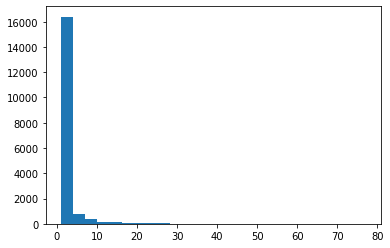

In [30]:
import matplotlib.pyplot as plt
plt.hist(actors_dict.values(), bins = 25)